In [2]:
import uproot
import awkward as ak
import hist
from hist import Hist
import matplotlib.pyplot as plt
import mplhep as hep
import sys
sys.path.append("/home/etl/Test_Stand/tbanalysis") #stupid python
from utils import plotting as pu
import numpy as np
from importlib import reload

In [3]:
sm_run =pu.TBplot("/home/etl/Test_Stand/tbanalysis/output_analysis_data/offsetScan@225/start_114344_stop_114443_setup_209_offset_10.0_energy_5.0_power_i1_module_209_bias_225_file_from_DESY_April_cubicLM_unbinned",
load_full_collection=True)

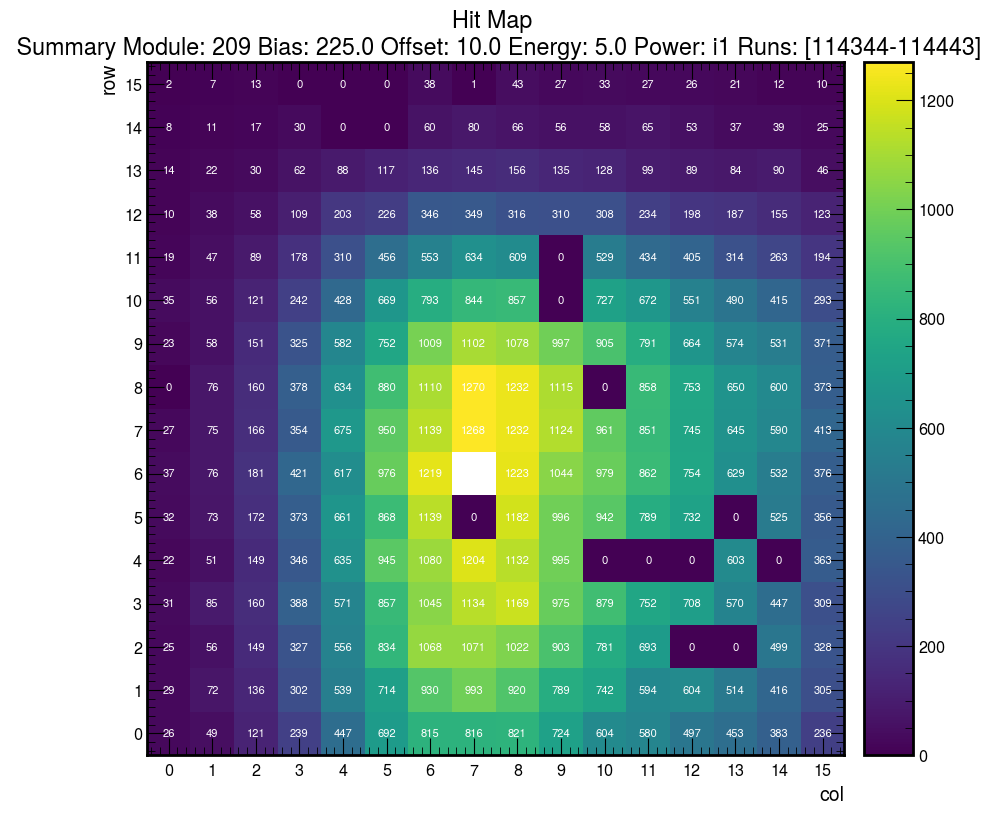

In [4]:
sm_run.hit_map()

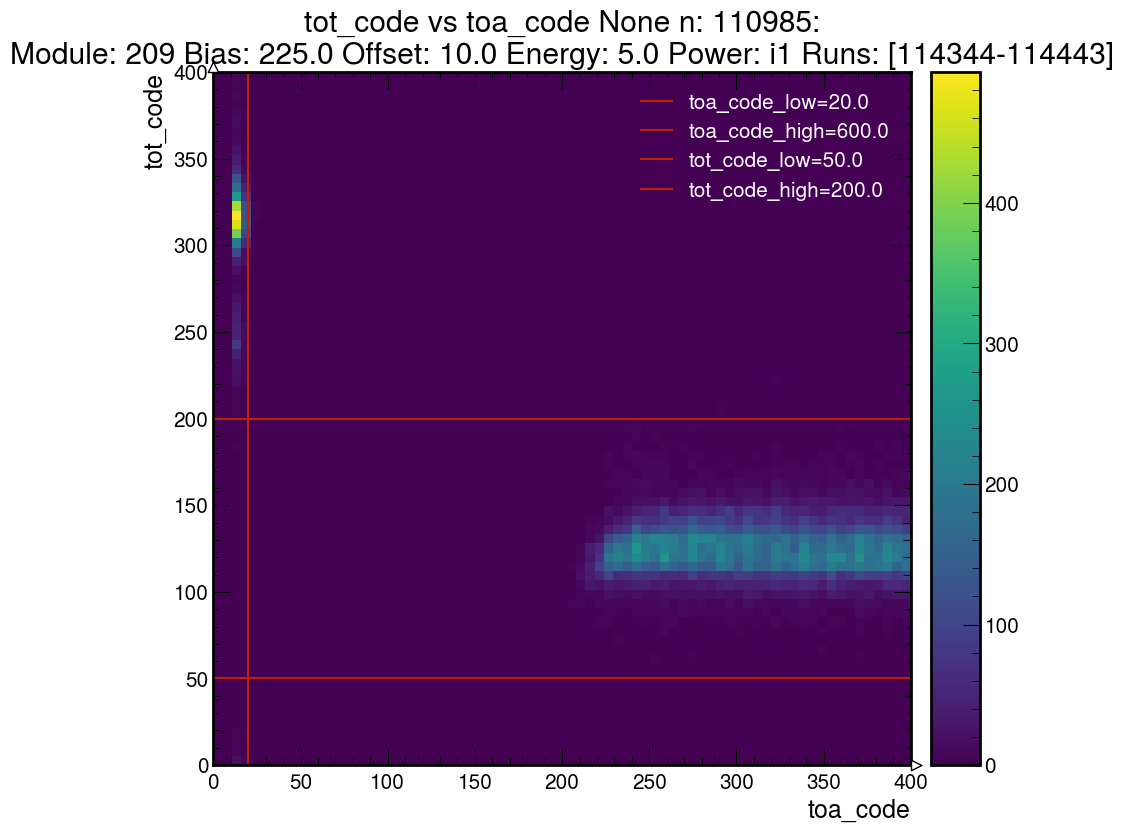

In [5]:

sm_run.heatmap('toa_code', 'tot_code')

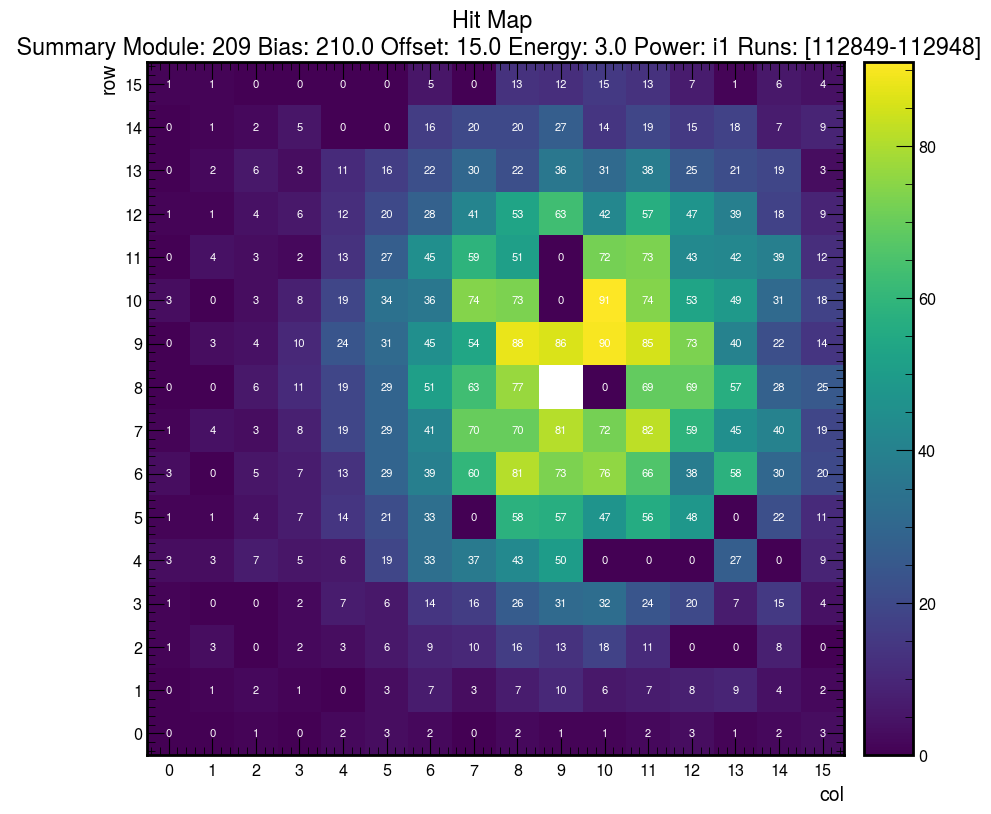

In [64]:
big_run = pu.TBplot(
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/first_small/start_112849_stop_112948_setup_209_offset_15.0_energy_3.0_power_i1_module_209_bias_210_file_from_DESY_April_cubicLM_unbinned",
    load_full_collection=True
)

big_run.hit_map()

Could not find optimal parameters, skipping fit...


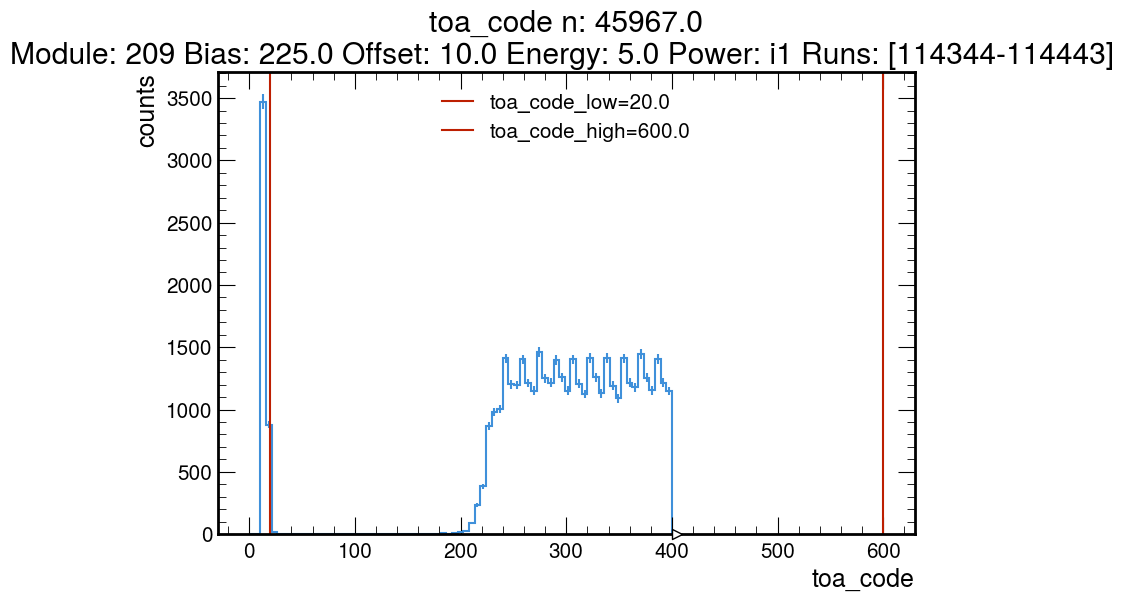

In [7]:
sm_run.histo1D('toa_code')

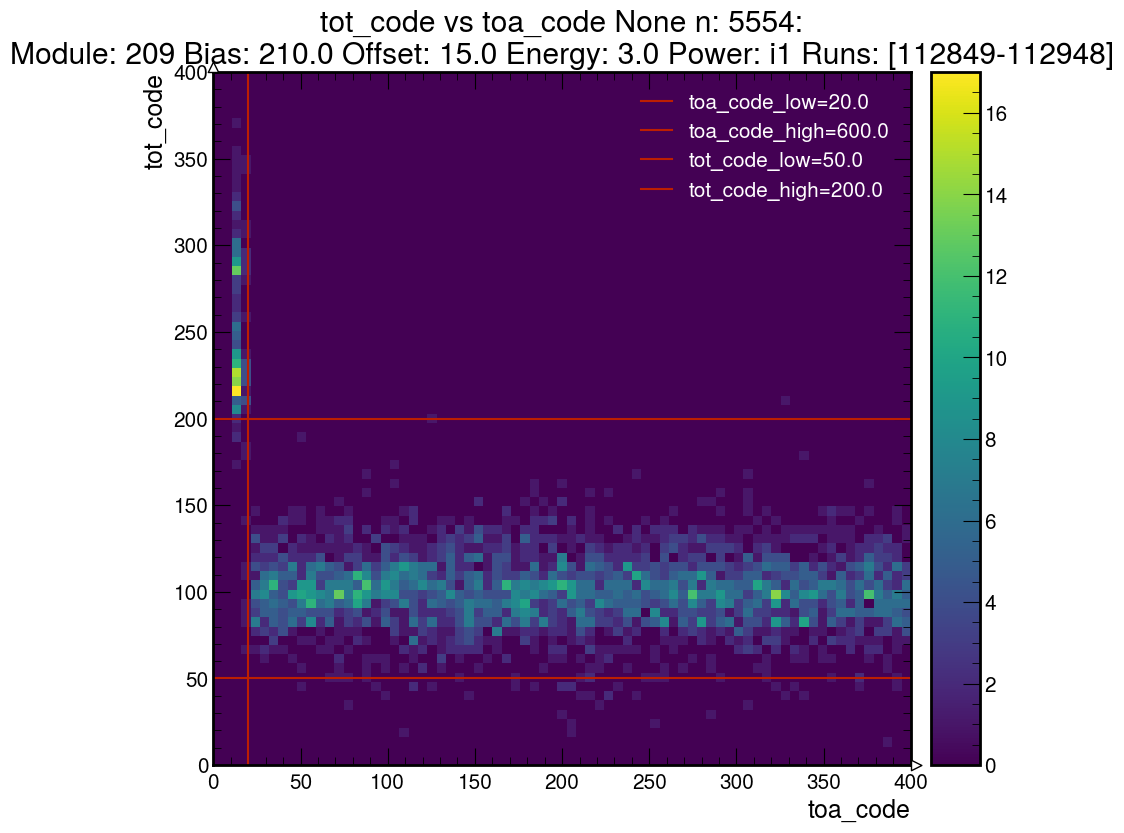

In [22]:
big_run.heatmap("toa_code", "tot_code")

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f10dfcf4440>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

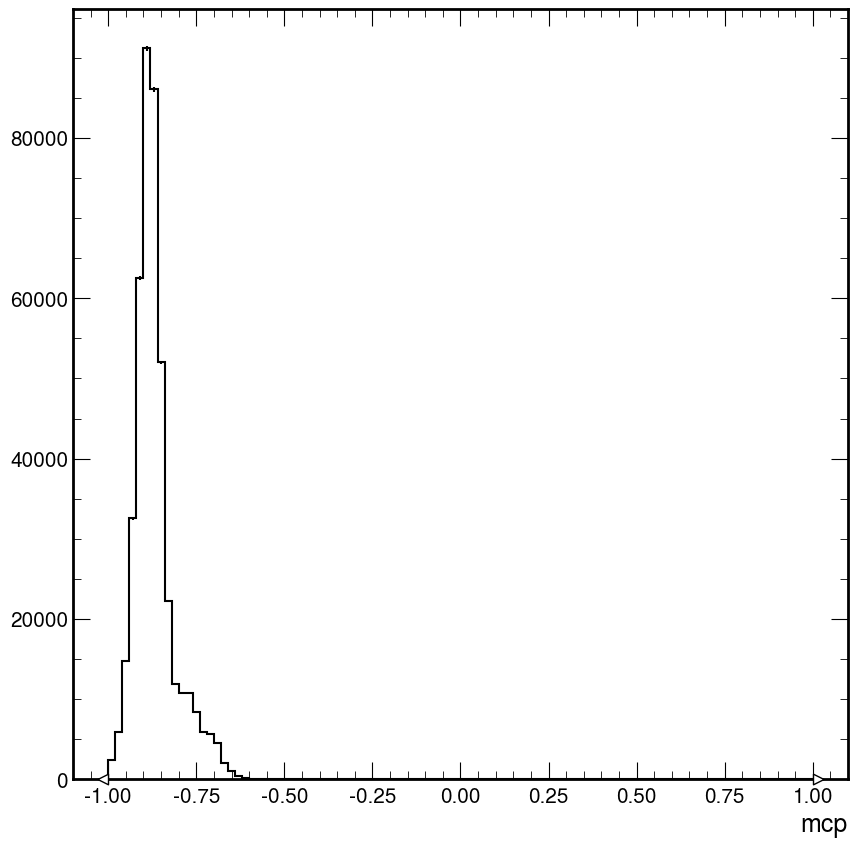

In [8]:
mcp_t = sm_run.events.mcp_timestamp
hist_axis = hist.axis.Regular(100,-1,1, name="mcp")
h = Hist(hist_axis).fill(mcp_t)
hep.histplot(h, color='black')

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f10d7a47fe0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

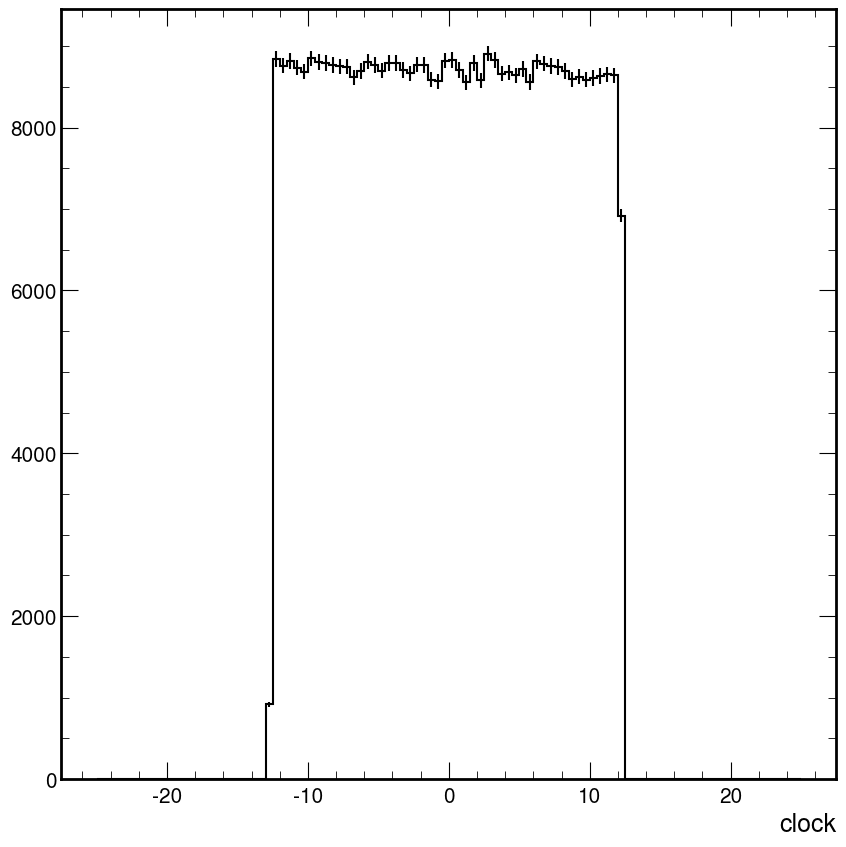

In [9]:
clk_t = sm_run.events.clock_timestamp
hist_axis = hist.axis.Regular(100,-25,25, name="clock")
h = Hist(hist_axis).fill(clk_t)
hep.histplot(h, color='black')


In [10]:
sm_run.events.fields


['event',
 'l1counter',
 'nrow',
 'row',
 'ncol',
 'col',
 'ntot_code',
 'tot_code',
 'ntoa_code',
 'toa_code',
 'ncal_code',
 'cal_code',
 'nelink',
 'elink',
 'nchipid',
 'chipid',
 'bcid',
 'nnhits',
 'nhits',
 'clock_timestamp',
 'mcp_amplitude',
 'mcp_timestamp',
 'cal_mode',
 'toa',
 'tot',
 'dt']

In [23]:
ak.firsts(sm_run.events.toa)


<Array [1.68, None, None, ..., None, None, 7.24] type='435000 * ?float64'>

In [27]:
import uproot 

from utils.clock_fit import calc_clock
# raw = uproot.open("/media/etl/Storage/DESY_April_2025/merged/run_112914.root")["pulse"].arrays()

# s, v = raw.clock_seconds, raw.clock_volts

# # ct = calc_clock(s*10**9, v, 0.25, 0.8, 0.5)


# # i = 65
# # plt.axvline(ct[i])
# # plt.scatter(s[i]*10**9, v[i])

# s = ak.flatten(s)
# v = ak.flatten(v)

# hist_2d = Hist(
#     hist.axis.Regular(100,-25,25, name='clock'),
#     hist.axis.Regular(100, -2,2, name='toa'),
# ).fill(sm_run.events.clock_timestamp, ak.firsts(sm_run.events.toa))

# hep.hist2dplot(hist_2d)

sm_run.events.bcid

<Array [2579, 2400, 1507, 211, ..., 2942, 1022, 1374] type='435000 * int64'>

In [ ]:
clock_timestamps2 = big_run.events.clock_timestamp
toa = big_run.events.toa

good_clock = clock_timestamps2[ak.num(toa)==1]
good_toa = ak.flatten(toa[ak.num(toa)==1])

print(good_clock)
print(good_toa)

print(len(good_clock))
print(len(good_toa))
hist_2d = Hist(
    hist.axis.Regular(100,-25,25, name='clock'),
    hist.axis.Regular(100, -25,25, name='toa'),
).fill(good_clock, good_toa)

hep.hist2dplot(hist_2d)

AttributeError: no field named 'clock_timestamp'

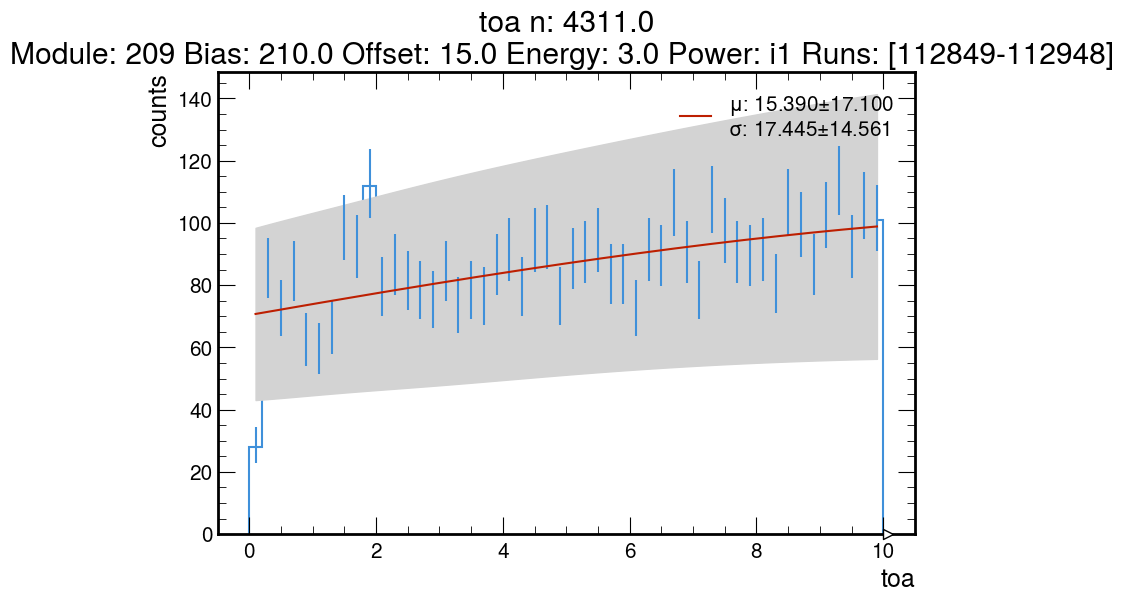

In [57]:
big_run.histo1D('toa')

In [1]:
kcu_delay = pu.TBplot(
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/offsetScan@225/start_114344_stop_114443_setup_209_offset_10.0_energy_5.0_power_i1_module_209_bias_225_file_from_DESY_April_cubicLM_unbinned",
    load_full_collection=True
)
kcu_delay.hit_map()
kcu_delay.histo1D('dt')

NameError: name 'pu' is not defined

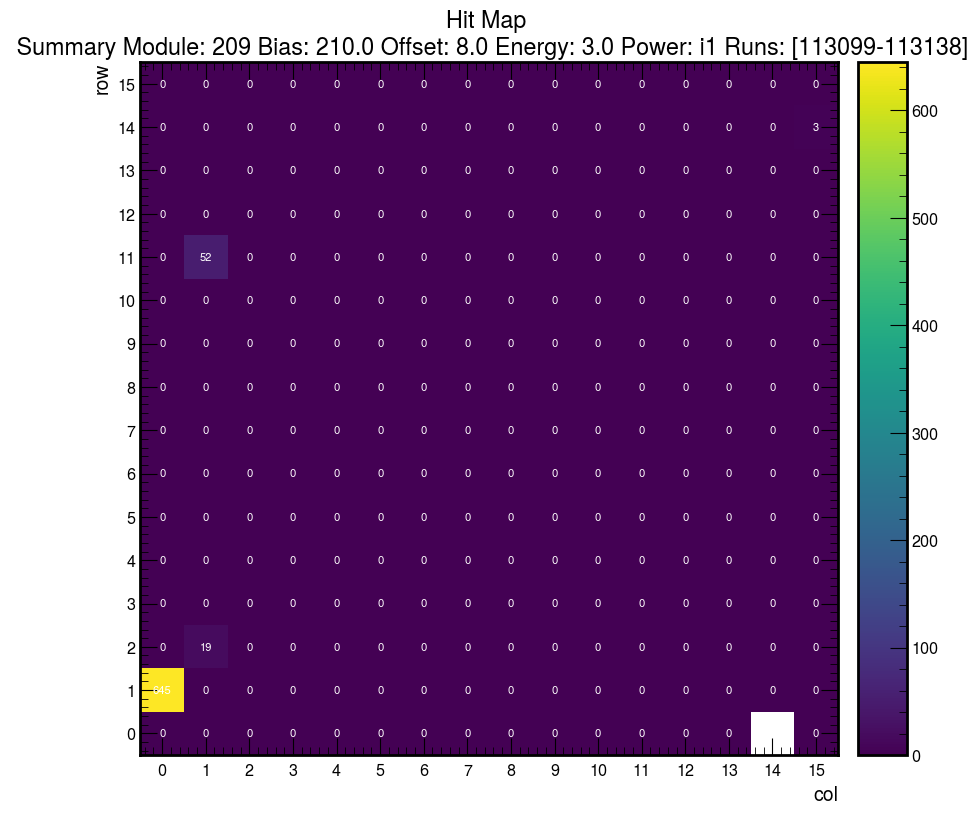

In [96]:
kho = pu.TBplot("/home/etl/Test_Stand/tbanalysis/output_analysis_data/with_kcu_delay_higher_offset/start_113099_stop_113138_setup_209_offset_8.0_energy_3.0_power_i1_module_209_bias_210_file_from_DESY_April_cubicLM_unbinned",
                load_full_collection=True)

kho.hit_map()

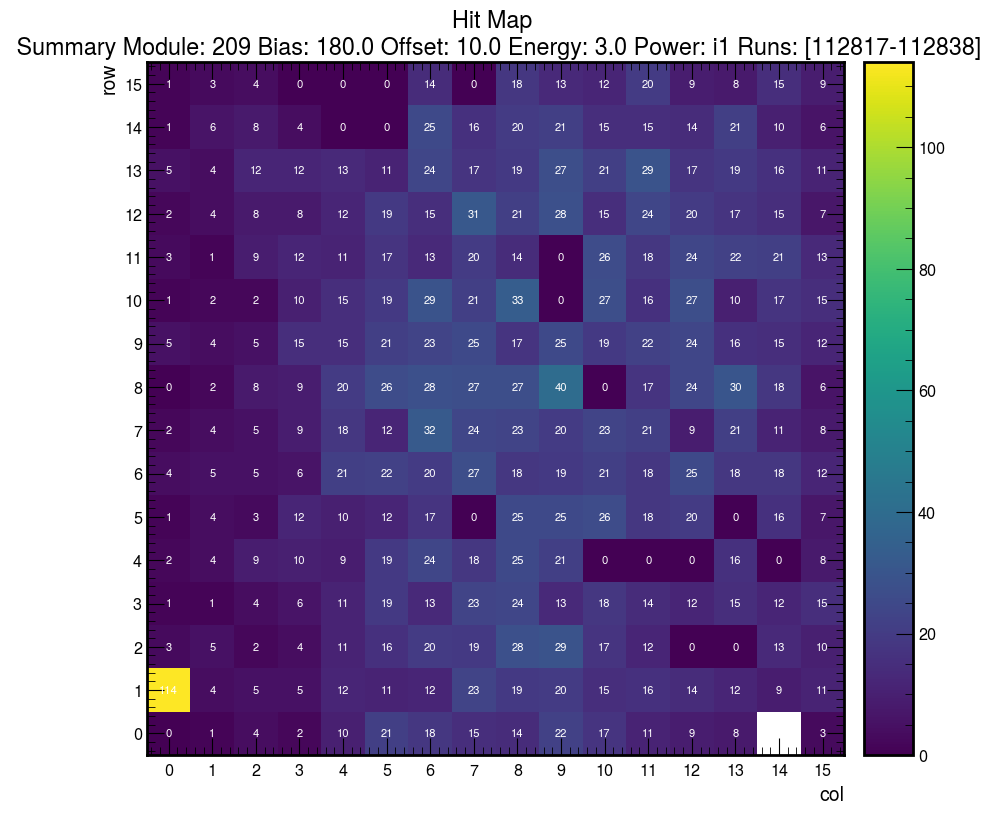

In [ ]:
t = pu.TBplot("/home/etl/Test_Stand/tbanalysis/output_analysis_data/with_kcu_delay/start_112999_stop_1123048_setup_209_offset_20.0_energy_3.0_power_i1_module_209_bias_210_file_from_DESY_April_cubicLM_unbinned", load_full_collection=True)
t.hit_map()